 Qual das disciplinas tem a maior amplitude de nota?


In [ ]:
import pandas as pd

# Carregar os dados do arquivo JSON
enem_2023 = pd.read_json('enem_2023.json')

# Excluir a coluna "Sexo" para realizar os cálculos apenas com colunas numéricas
enem_2023_numerico = enem_2023.drop(columns=['Sexo'])

# 1. Amplitude de cada disciplina
amplitudes = enem_2023_numerico.max() - enem_2023_numerico.min()

# Mostrar o resultado
print("Amplitude de cada disciplina:")
print(amplitudes)


Amplitude de cada disciplina:
Linguagens              517.456317
Ciências humanas        474.019695
Ciências da natureza    487.604568
Matemática              488.077902
Redação                 729.160035
dtype: float64


 Qual é a média e a mediana para cada uma das disciplinas? (Lembre-se
de remover todos os valores nulos quando considerar a mediana)

In [ ]:
# 2. Média e mediana de cada disciplina
medias = enem_2023_numerico.mean()
medianas = enem_2023_numerico.median()

# Mostrar os resultados
print("Média de cada disciplina:")
print(medias)

print("\nMediana de cada disciplina:")
print(medianas)


Média de cada disciplina:
Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.783532
dtype: float64

Mediana de cada disciplina:
Linguagens              515.045250
Ciências humanas        524.519920
Ciências da natureza    500.479263
Matemática              533.247767
Redação                 635.273973
dtype: float64


Considerando o curso de Ciência da Computação da UFPE, onde o peso
cada uma das disciplinas ponderado:

In [ ]:
# Definição dos pesos para o curso de Ciência da Computação na UFPE
pesos = {
    'Redação': 2,
    'Matemática': 4,
    'Linguagens': 2,
    'Ciências humanas': 1,
    'Ciências da natureza': 1
}

# 3. Calcular a média ponderada para cada estudante
enem_2023_numerico['nota_ponderada'] = (
    pesos['Redação'] * enem_2023_numerico['Redação'] +
    pesos['Matemática'] * enem_2023_numerico['Matemática'] +
    pesos['Linguagens'] * enem_2023_numerico['Linguagens'] +
    pesos['Ciências humanas'] * enem_2023_numerico['Ciências humanas'] +
    pesos['Ciências da natureza'] * enem_2023_numerico['Ciências da natureza']
) / sum(pesos.values())

# Selecionar os 500 estudantes mais bem colocados com base na nota ponderada
top_500 = enem_2023_numerico.nlargest(500, 'nota_ponderada')

# 3. Calcular a média e desvio padrão das notas dos 500 estudantes mais bem colocados
media_top_500 = top_500['nota_ponderada'].mean()
desvio_padrao_top_500 = top_500['nota_ponderada'].std()

# Mostrar os resultados
print("Média dos 500 estudantes mais bem colocados:", media_top_500)
print("Desvio padrão dos 500 estudantes mais bem colocados:", desvio_padrao_top_500)


Média dos 500 estudantes mais bem colocados: 557.2896772018769
Desvio padrão dos 500 estudantes mais bem colocados: 40.435866299464266


 Se todos esses estudantes aplicassem para ciência da computação e
existem apenas 40 vagas, qual seria a variância e média da nota dos
estudantes que entraram no curso de ciência da computação?

In [ ]:
# 4. Selecionar os 40 melhores para as vagas do curso de Ciência da Computação
top_40 = top_500.nlargest(40, 'nota_ponderada')

# Calcular a média e variância das notas dos 40 estudantes mais bem colocados
media_top_40 = top_40['nota_ponderada'].mean()
variancia_top_40 = top_40['nota_ponderada'].var()

# Mostrar os resultados
print("Média dos 40 estudantes mais bem colocados:", media_top_40)
print("Variância das notas dos 40 estudantes mais bem colocados:", variancia_top_40)


Média dos 40 estudantes mais bem colocados: 636.6827415075188
Variância das notas dos 40 estudantes mais bem colocados: 295.7675036004101


Qual o valor do teto do terceiro quartil para as disciplinas de
matemática e linguagens?

In [ ]:
# 5. Calcular o teto do terceiro quartil para as disciplinas de Matemática e Linguagens
q3_matematica = enem_2023_numerico['Matemática'].quantile(0.75)
q3_linguagens = enem_2023_numerico['Linguagens'].quantile(0.75)

# Mostrar os resultados
print("Teto do terceiro quartil para Matemática:", q3_matematica)
print("Teto do terceiro quartil para Linguagens:", q3_linguagens)


Teto do terceiro quartil para Matemática: 592.9129628887
Teto do terceiro quartil para Linguagens: 571.6358759278


Faça o histograma de Redação e Linguagens, de 20 em 20 pontos.
Podemos dizer que são histogramas simétricos, justifique e classifique
se não assimétricas?

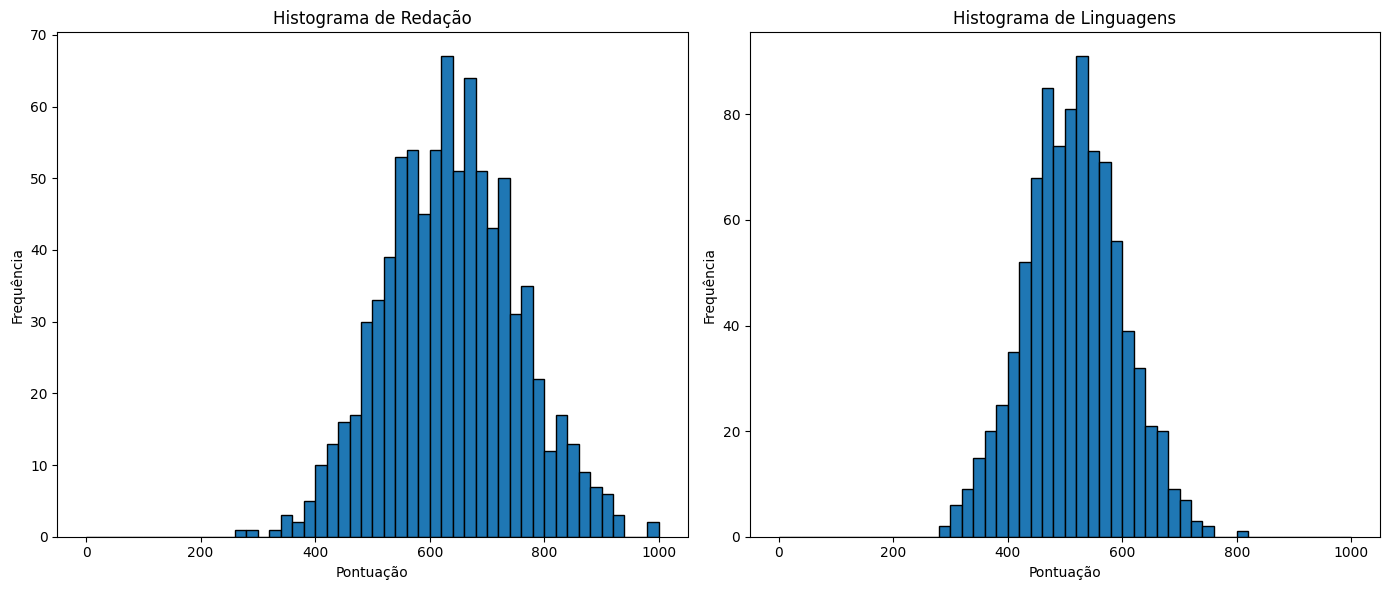

In [ ]:
import matplotlib.pyplot as plt

# Histograma para Redação e Linguagens com intervalos de 20 pontos
plt.figure(figsize=(14, 6))

# Histograma de Redação
plt.subplot(1, 2, 1)
plt.hist(enem_2023_numerico['Redação'].dropna(), bins=range(0, 1001, 20), edgecolor='black')
plt.title('Histograma de Redação')
plt.xlabel('Pontuação')
plt.ylabel('Frequência')

# Histograma de Linguagens
plt.subplot(1, 2, 2)
plt.hist(enem_2023_numerico['Linguagens'].dropna(), bins=range(0, 1001, 20), edgecolor='black')
plt.title('Histograma de Linguagens')
plt.xlabel('Pontuação')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()


Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma
opinião quanto a simetria? [plt.hist(dado, bins=_, range=[0, 1000])

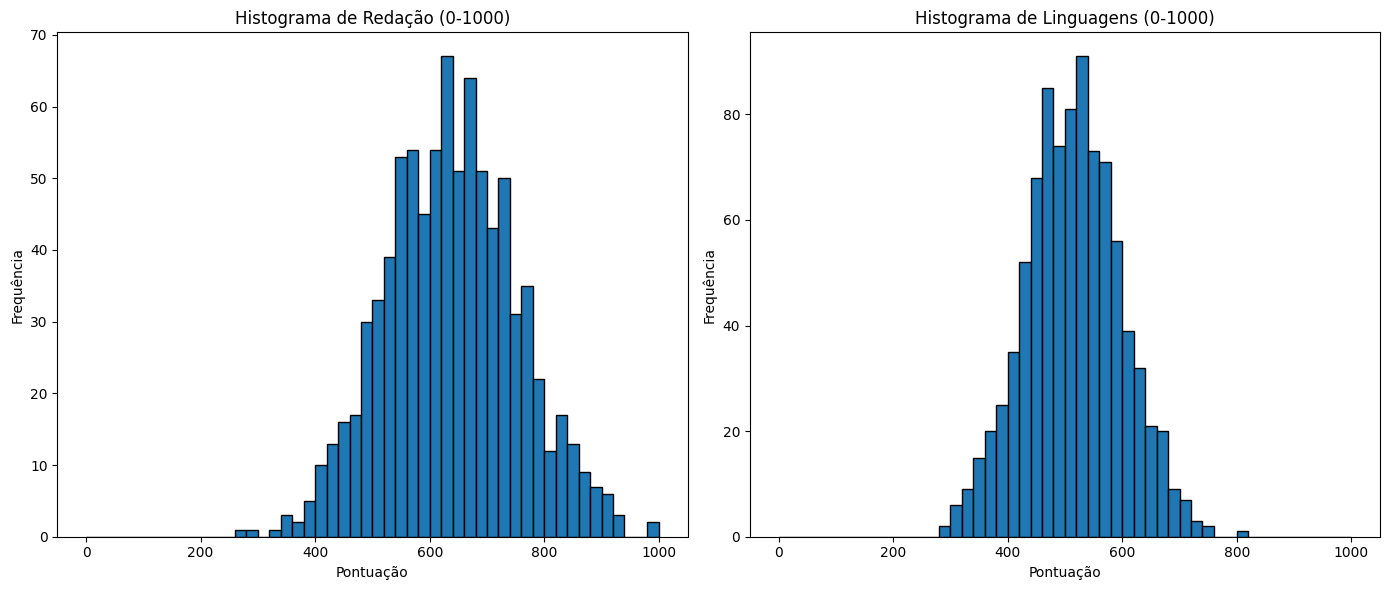

In [ ]:
# Histograma para Redação e Linguagens com range fixo de 0 até 1000
plt.figure(figsize=(14, 6))

# Histograma de Redação
plt.subplot(1, 2, 1)
plt.hist(enem_2023_numerico['Redação'].dropna(), bins=50, range=[0, 1000], edgecolor='black')
plt.title('Histograma de Redação (0-1000)')
plt.xlabel('Pontuação')
plt.ylabel('Frequência')

# Histograma de Linguagens
plt.subplot(1, 2, 2)
plt.hist(enem_2023_numerico['Linguagens'].dropna(), bins=50, range=[0, 1000], edgecolor='black')
plt.title('Histograma de Linguagens (0-1000)')
plt.xlabel('Pontuação')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()


Faça um boxplot do quartil de todas as disciplinas de ciências da
natureza e redação. É possível enxergar outliers? Utilize o método IQR.

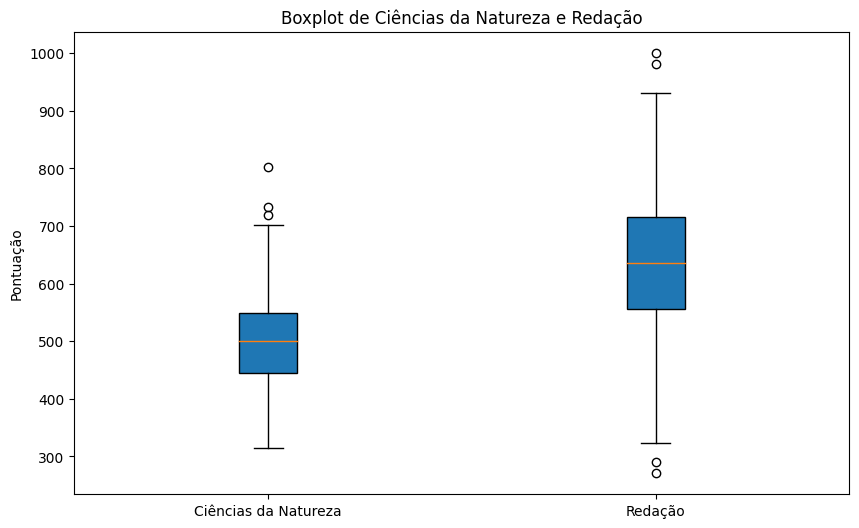

Outliers em Ciências da Natureza: 3 encontrados
Outliers em Redação: 4 encontrados


In [ ]:
# Boxplot de Ciências da Natureza e Redação
plt.figure(figsize=(10, 6))
plt.boxplot([enem_2023_numerico['Ciências da natureza'].dropna(), enem_2023_numerico['Redação'].dropna()],
            labels=['Ciências da Natureza', 'Redação'], patch_artist=True)

plt.title('Boxplot de Ciências da Natureza e Redação')
plt.ylabel('Pontuação')
plt.show()

# Identificar outliers usando o método IQR
def identify_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

outliers_cn = identify_outliers(enem_2023_numerico['Ciências da natureza'])
outliers_redacao = identify_outliers(enem_2023_numerico['Redação'])

print(f"Outliers em Ciências da Natureza: {len(outliers_cn)} encontrados")
print(f"Outliers em Redação: {len(outliers_redacao)} encontrados")


Remova todos os outliers e verifique se eles são passíveis de alterar a
média nacional significativamente? (considere significativamente um
valor acima de 5%)

In [ ]:
# Remover os outliers
enem_2023_sem_outliers = enem_2023_numerico.copy()
enem_2023_sem_outliers = enem_2023_sem_outliers[
    ~enem_2023_sem_outliers.index.isin(outliers_cn.index.union(outliers_redacao.index))
]

# Calcular a média antes e depois da remoção dos outliers
media_antes = enem_2023_numerico.mean()
media_depois = enem_2023_sem_outliers.mean()

# Verificar a alteração na média
alteracao_media = ((media_depois - media_antes) / media_antes) * 100

# Mostrar resultados
print("Alteração percentual na média após remoção dos outliers:")
print(alteracao_media)


Alteração percentual na média após remoção dos outliers:
Linguagens             -0.009990
Ciências humanas       -0.035856
Ciências da natureza   -0.229157
Matemática              0.044125
Redação                -0.023995
nota_ponderada          0.028974
dtype: float64


Considerando valores nulos, tente encontrar qual seria a melhor medida
de tendência que pode substituir as notas nulas. Média, moda ou
mediana? Substitua o valor por todos os três e diga qual delas altera
menos a média geral e o desvio padrão.

In [ ]:
import pandas as pd

# Carregar os dados do arquivo JSON
enem_2023 = pd.read_json('enem_2023.json')

# Excluir a coluna "Sexo" para realizar os cálculos apenas com colunas numéricas
enem_2023_numerico = enem_2023.drop(columns=['Sexo'])

# Função para calcular o impacto na média e desvio padrão ao substituir valores nulos
def calcular_impacto_substituicao(dados, metodo):
    if metodo == 'média':
        dados_preenchidos = dados.fillna(dados.mean())
    elif metodo == 'mediana':
        dados_preenchidos = dados.fillna(dados.median())
    elif metodo == 'moda':
        dados_preenchidos = dados.fillna(dados.mode().iloc[0])
    else:
        raise ValueError("Método desconhecido")

    media_impacto = dados_preenchidos.mean()
    desvio_padrao_impacto = dados_preenchidos.std()

    return media_impacto, desvio_padrao_impacto

# Calcular o impacto para cada método
impacto_media = calcular_impacto_substituicao(enem_2023_numerico, 'média')
impacto_mediana = calcular_impacto_substituicao(enem_2023_numerico, 'mediana')
impacto_moda = calcular_impacto_substituicao(enem_2023_numerico, 'moda')

# Mostrar resultados
print("Impacto ao substituir valores nulos:")
print(f"Média: Média = \n{impacto_media[0]}\n Desvio Padrão = \n{impacto_media[1]}\n")
print(f"Mediana: Média = \n{impacto_mediana[0]}\n Desvio Padrão = \n{impacto_mediana[1]}\n")
print(f"Moda: Média = \n{impacto_moda[0]}\n Desvio Padrão = \n{impacto_moda[1]}\n")


Impacto ao substituir valores nulos:
Média: Média = 
Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.783532
dtype: float64
 Desvio Padrão = 
Linguagens               79.560718
Ciências humanas         75.277806
Ciências da natureza     71.486677
Matemática               83.286987
Redação                 106.953175
dtype: float64

Mediana: Média = 
Linguagens              514.578415
Ciências humanas        526.880850
Ciências da natureza    499.520391
Matemática              535.759100
Redação                 637.432194
dtype: float64
 Desvio Padrão = 
Linguagens               79.560876
Ciências humanas         75.280340
Ciências da natureza     71.488051
Matemática               83.290104
Redação                 106.956723
dtype: float64

Moda: Média = 
Linguagens              491.089754
Ciências humanas        511.865175
Ciências da natureza    466.770440
Matemática 